In [2]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

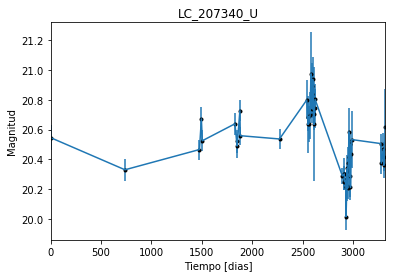

In [6]:
data = np.genfromtxt('LC_207340_U.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_207340_U')
plt.savefig("LC_207340_U.pdf")

In [4]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [5]:
%%capture capt
sample = model.run_mcmc(20000)

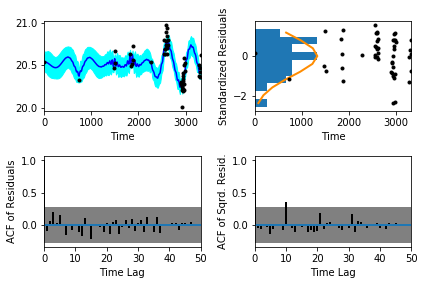

In [7]:
sample.assess_fit()

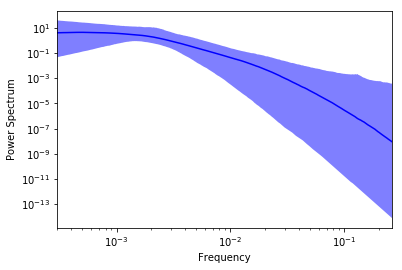

In [11]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [12]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

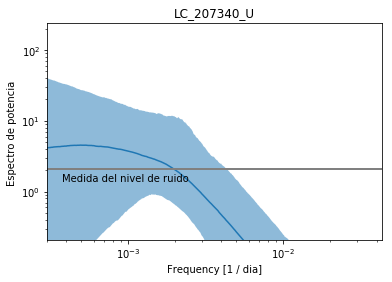

In [13]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_207340_U')
plt.savefig("Medida del nivel de ruido_U.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_207340_U')

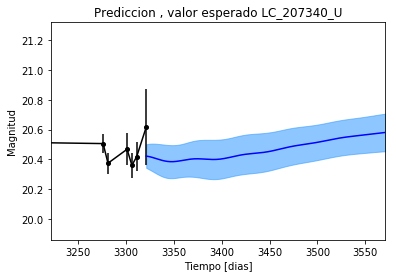

In [14]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_207340_U')

Text(0.5,1,'Prediccion, Caminos simulados LC_207340_U')

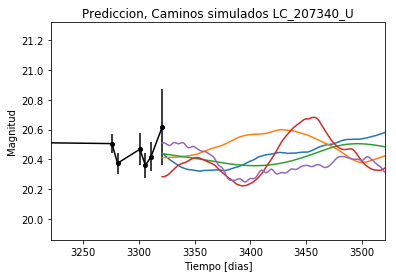

In [15]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados LC_207340_U')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


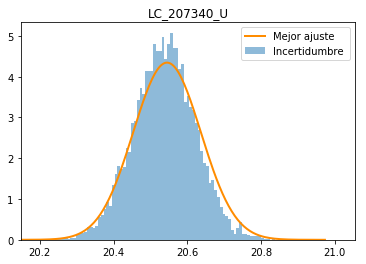

In [16]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_207340_U')
plt.savefig("Mejor_ajuste_LC_207340_U.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_207340_U')

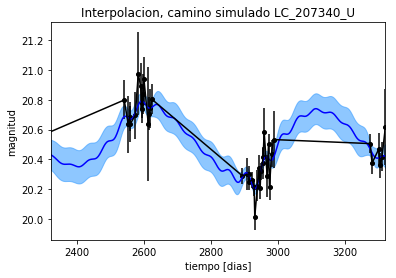

In [17]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_207340_U')

Text(0.5,1,'Interpolacion, camino simulado LC_207340_U')

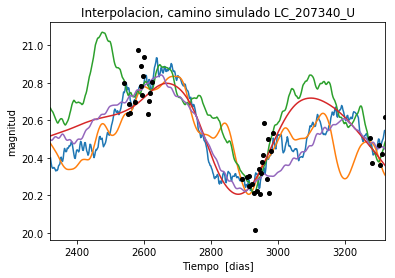

In [18]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_207340_U')

In [19]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [20]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 243.463418091
Median: 0.00789145642783
Standard deviation: 0.0975062158312
68% credibility interval: [ 0.00088623  0.08713631]
95% credibility interval: [  3.51993023e-04   4.06466539e-01]
99% credibility interval: [  3.17274833e-04   5.01532453e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 231.488821262
Median: 0.00271299525315
Standard deviation: 0.0551684809903
68% credibility interval: [ 0.00057891  0.02836242]
95% credibility interval: [ 0.00033155  0.19827681]
99% credibility interval: [  3.08677753e-04   3.96360829e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 1291.72971729
Median: 0.0177708083715
Standar

In [21]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 983.59729872
Median: 53.352733216
Standard deviation: 1.70288257097
68% credibility interval: [ 51.4342784   54.57785867]
95% credibility interval: [ 48.90706121  55.36306973]
99% credibility interval: [ 46.60036379  55.77711441]


In [22]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 274.609131754
Median: 0.468388320261
Standard deviation: 1.23320332027
68% credibility interval: [ 0.05685331  2.33653129]
95% credibility interval: [ 0.01436975  4.22080633]
99% credibility interval: [ 0.00974342  5.77963986]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 406.105031149
Median: 0.269053931993
Standard deviation: 2.77419124909
68% credibility interval: [ 0.0152197   3.44524706]
95% credibility interval: [  1.11170039e-0

In [23]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 12020.9438962
Median: 1.36222186563e-15
Standard deviation: 5.39688065553e+74
68% credibility interval: [  1.07371482e-52   1.79051453e+20]
95% credibility interval: [  9.71693858e-90   1.18615124e+42]
99% credibility interval: [  2.15081108e-101   8.34914175e+070]


In [24]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 3148.3207641
Median: 20.5174740287
Standard deviation: 0.0660209228299
68% credibility interval: [ 20.45818844  20.57092117]
95% credibility interval: [ 20.37764071  20.64285951]
99% credibility interval: [ 20.28934313  20.7070694 ]


In [25]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 346.591043819
Median: 0.0220349163119
Standard deviation: 0.136280447781
68% credibility interval: [ 0.          0.23653858]
95% credibility interval: [ 0.          0.46824844]
99% credibility interval: [ 0.          0.51348166]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 346.591043819
Median: 0.0220349163119
Standard deviation: 0.136280447781
68% credibility interval: [ 0.          0.23653858]
95% credibility interval: [ 0.          0.46824844]
99% credibility interval: [ 0.          0.51348166]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 454.963212058
Median: 0.0
Standard deviation: 0.00101942354716
68% cre

In [26]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 983.59729872
Median: 53.352733216
Standard deviation: 1.70288257097
68% credibility interval: [ 51.4342784   54.57785867]
95% credibility interval: [ 48.90706121  55.36306973]
99% credibility interval: [ 46.60036379  55.77711441]


In [27]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2405.78172079
Median: 0.0249835719827
Standard deviation: 0.0250460427157
68% credibility interval: [ 0.0149493   0.04493467]
95% credibility interval: [ 0.00976155  0.08901297]
99% credibility interval: [ 0.00715017  0.14452306]


In [28]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1570.61761606
Median: 1.00001414253
Standard deviation: 0.167049102885
68% credibility interval: [ 0.85624834  1.18118677]
95% credibility interval: [ 0.73747809  1.38938316]
99% credibility interval: [ 0.66868997  1.53764276]


In [29]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 562.274425553
Median: 4.75631976052e-05
Standard deviation: 0.044674530427
68% credibility interval: [  5.21640645e-23   4.33842752e-03]
95% credibility interval: [  1.08992773e-45   1.14679475e-01]
99% credibility interval: [  2.62705275e-75   3.60633275e-01]


In [30]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 243.463418091
Median: (-0.0495834830796-0.0854697490573j)
Standard deviation: 1.05287556805
68% credibility interval: [-0.54749359-2.4834581j  -0.00556836-0.19140169j]
95% credibility interval: [ -2.55390458e+00+0.j          -2.21163739e-03-0.01265502j]
99% credibility interval: [ -3.15122134e+00+0.j          -1.99349657e-03-0.00748212j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 231.488821262
Median: (-0.017046251913+0.0183878369316j)
Standard deviation: 0.923776155482
68% credibility interval: [-0.17820631+0.20528225j -0.00363738+0.52213337j]
95% credibility interval: [-1.24580996+2.17088774j -0.00208319+0.j        ]
99% credibility interval: [ -2.49040854e+00+3.07953315j  -1.93947952e-03+0.01303365j]
Posterior 